In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

setattr(tfds.image_classification.cats_vs_dogs, '_URL', "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

(datos_entrenamiento, datos_prueba), metadatos = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

IMG_SIZE = 128

def preparar_imagen(imagen, etiqueta):
    imagen = tf.image.resize(imagen, (IMG_SIZE, IMG_SIZE))
    imagen = tf.cast(imagen, tf.float32)
    imagen = imagen / 255.0
    return imagen, etiqueta

datos_entrenamiento = datos_entrenamiento.map(preparar_imagen)
datos_prueba = datos_prueba.map(preparar_imagen)

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

datos_entrenamiento = datos_entrenamiento.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
datos_prueba = datos_prueba.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

EPOCHS = 10
historia = modelo.fit(datos_entrenamiento, epochs=EPOCHS, validation_data=datos_prueba)

resultado = modelo.evaluate(datos_prueba)
print(f'Pérdida: {resultado[0]}, Precisión: {resultado[1]}')

modelo.save('modelo_perros_gatos.h5')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.LKFXZS_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/10
582/582 [==============================] - 40s 58ms/step - loss: 0.6264 - accuracy: 0.6479 - val_loss: 0.5555 - val_accuracy: 0.7074
Epoch 2/10
582/582 [==============================] - 32s 52ms/step - loss: 0.4865 - accuracy: 0.7618 - val_loss: 0.4663 - val_accuracy: 0.7775
Epoch 3/10
582/582 [==============================] - 31s 51ms/step - loss: 0.3947 - accuracy: 0.8189 - val_loss: 0.4133 - val_accuracy: 0.8080
Epoch 4/10
582/582 [==============================] - 31s 51ms/step - loss: 0.3209 - accuracy: 0.8595 - val_loss: 0.4773 - val_accuracy: 0.8029
Epoch 5/10
582/582 [==============================] - 32s 51ms/step - loss: 0.2237 - accuracy: 0.9047 - val_loss: 0.4850 - val_accuracy: 0.8231
Epoch 6/10
582/582 [==============================] - 31s 52ms/step - loss: 0.1290 - accuracy: 0.9513 - val_loss: 0.6708 - val_accuracy: 0.8177
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 37ms/step


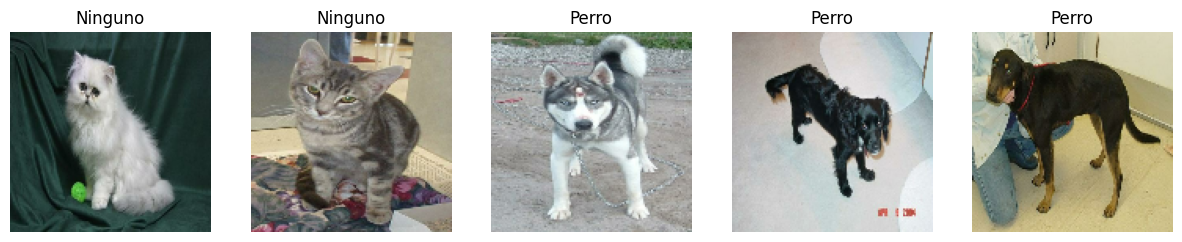

1/1 [==============================] - 0s 39ms/step


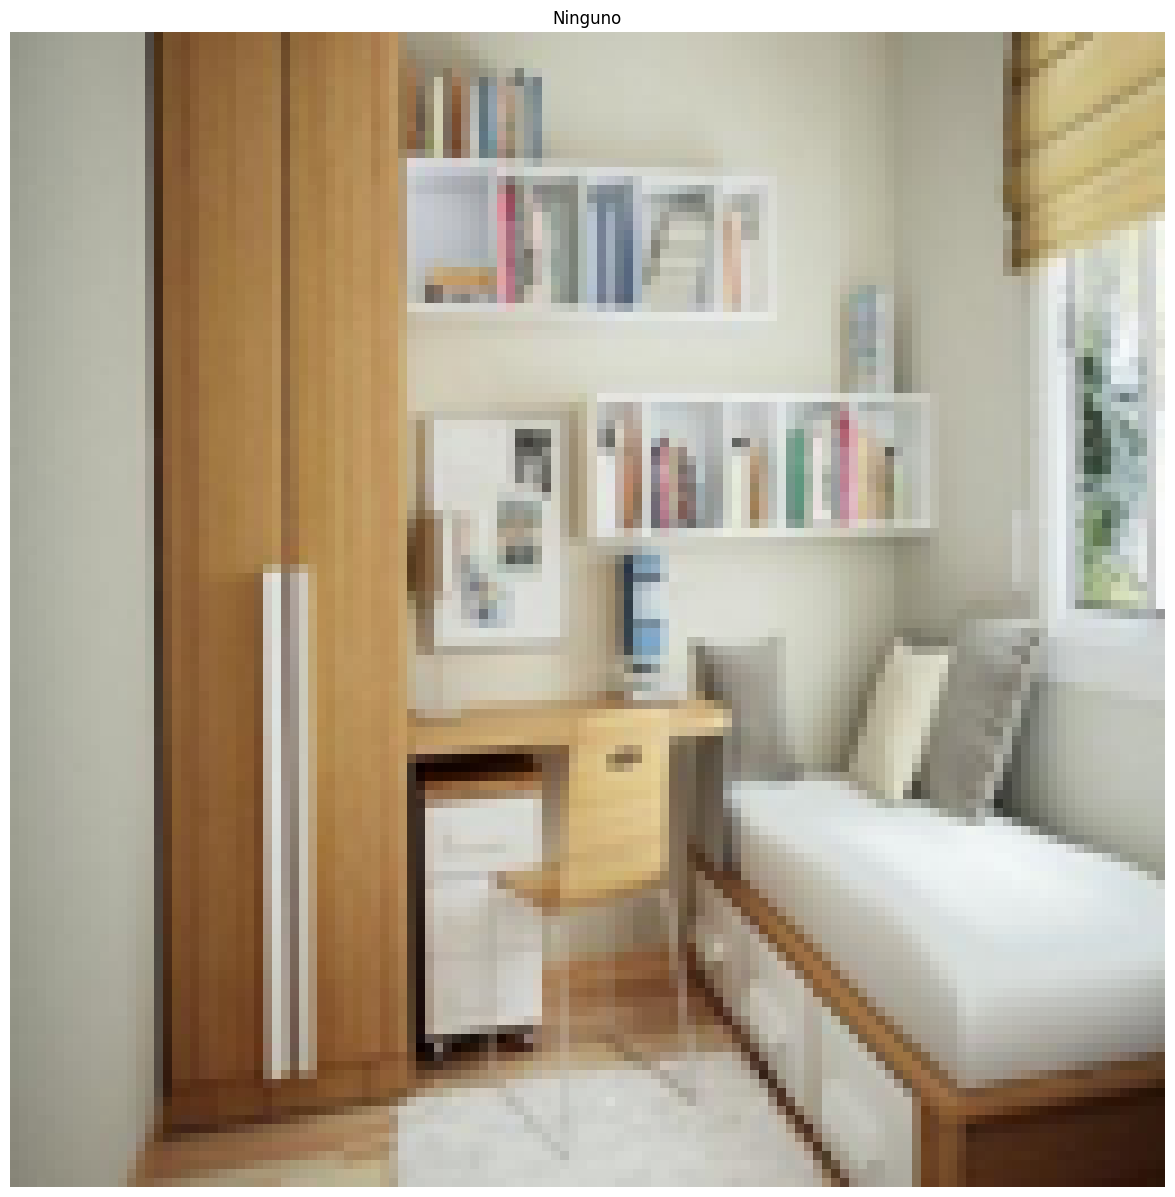

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

def cargar_imagen_externa(ruta_imagen):
    imagen = Image.open(ruta_imagen)
    imagen = imagen.resize((128, 128))
    imagen = np.array(imagen) / 255.0
    return imagen

def mostrar_imagenes_predicciones(modelo, dataset, num_imagenes=5, imagen_externa=None):
    imagenes, etiquetas = [], []
    for imagen, etiqueta in dataset.unbatch().take(1000):
        imagenes.append(imagen)
        etiquetas.append(etiqueta)

    if imagen_externa is None:
        indices_random = tf.random.shuffle(tf.range(len(imagenes)))[:num_imagenes]
        imagenes_random = [imagenes[i] for i in indices_random.numpy()]
    else:
        imagenes_random = [imagen_externa]
        num_imagenes = 1

    plt.figure(figsize=(15, 15))
    for i in range(num_imagenes):
        ax = plt.subplot(1, num_imagenes, i + 1)
        prediccion = modelo.predict(tf.expand_dims(imagenes_random[i], axis=0))
        prediccion_clase = np.argmax(prediccion, axis=1)[0]

        if prediccion[0] < 0.1:
            prediccion_etiqueta = "Ninguno"
        elif prediccion[0] < 0.7:
            prediccion_etiqueta = "Gato"
        else:
            prediccion_etiqueta = "Perro"

        plt.imshow(imagenes_random[i])
        plt.title(prediccion_etiqueta)
        plt.axis("off")
    plt.show()

mostrar_imagenes_predicciones(modelo, datos_prueba)

ruta_imagen = 'ninguno_1.jpg'
imagen_externa = cargar_imagen_externa(ruta_imagen)
mostrar_imagenes_predicciones(modelo, datos_prueba, imagen_externa=imagen_externa)
